<a href="https://colab.research.google.com/github/Inaldo-Barros/Sistema_Recomend-o/blob/main/sistema_de_recomenda%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

Utilizaremos um dataset de imagens. Para este exemplo, vamos usar o CIFAR-10, que contém 60.000 imagens em 10 classes:

In [3]:
# Carregar o dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Redimensionar as imagens para um formato padrão
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Usaremos uma rede neural pré-treinada para extrair características das imagens. Vamos utilizar o modelo MobileNetV2:

In [4]:
# Carregar o modelo MobileNetV2 pré-treinado
base_model = tf.keras.applications.MobileNetV2(input_shape=(32, 32, 3),
                                               include_top=False,
                                               weights='imagenet')

# Criar um modelo para extrair características das imagens
model = tf.keras.models.Model(inputs=base_model.input,
                              outputs=base_model.layers[-1].output)

# Função para extrair características
def extract_features(images):
    return model.predict(images)


<ipython-input-4-6b03a3849906>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(input_shape=(32, 32, 3),


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Usaremos o algoritmo Nearest Neighbors para encontrar as imagens mais semelhantes:

In [5]:
# Extrair características das imagens de treinamento
features_train = extract_features(x_train)

# Treinar o modelo de Nearest Neighbors
nn_model = NearestNeighbors(n_neighbors=5, algorithm='auto')
nn_model.fit(features_train.reshape(features_train.shape[0], -1))


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 27ms/step


NearestNeighbors()

Agora, podemos realizar recomendações com base em uma imagem de exemplo:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


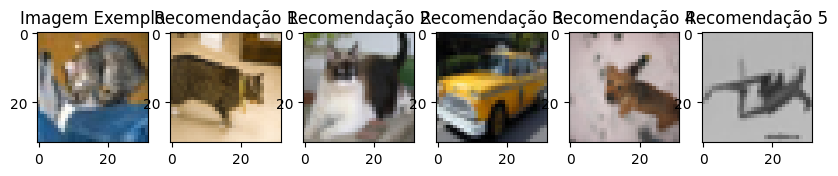

In [6]:
# Selecionar uma imagem de exemplo
example_image = x_test[0]

# Extrair características da imagem de exemplo
example_features = extract_features(np.expand_dims(example_image, axis=0))

# Encontrar as imagens mais semelhantes
distances, indices = nn_model.kneighbors(example_features.reshape(1, -1))

# Exibir a imagem de exemplo e as imagens recomendadas
plt.figure(figsize=(10, 10))
plt.subplot(1, 6, 1)
plt.imshow(example_image)
plt.title("Imagem Exemplo")
for i, index in enumerate(indices[0]):
    plt.subplot(1, 6, i + 2)
    plt.imshow(x_train[index])
    plt.title(f"Recomendação {i + 1}")
plt.show()
